# Classification of Positive and Negative comments on Amazon for their instruments 

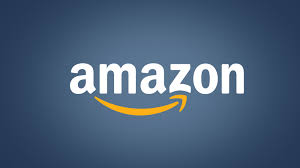

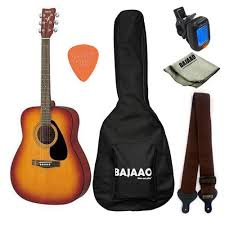

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv
/kaggle/input/amazon-music-reviews/Musical_Instruments_5.json


![](https://ae01.alicdn.com/kf/H691245b687f742f1a33149f0b57ba495j/headless-electric-acoustic-silent-left-right-hand-guitar-travel-mini-portable-built-in-effect-free-shipping.jpg)

In [2]:
data = pd.read_csv('/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv')
data

reviewerID        asin  \
0      A2IBPI20UZIR0U  1384719342   
1      A14VAT5EAX3D9S  1384719342   
2      A195EZSQDW3E21  1384719342   
3      A2C00NNG1ZQQG2  1384719342   
4       A94QU4C90B1AX  1384719342   
...               ...         ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC   
10257   A1RPTVW5VEOSI  B00JBIVXGC   
10258   AWCJ12KBO5VII  B00JBIVXGC   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC   
10260  A2WA8TDCTGUADI  B00JBIVXGC   

                                           reviewerName   helpful  \
0      cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                                  Jake  [13, 14]   
2                         Rick Bennette "Rick Bennette"    [1, 1]   
3                             RustyBill "Sunday Rocker"    [0, 0]   
4                                         SEAN MASLANKA    [0, 0]   
...                                                 ...       ...   
10256                                   Lonnie M. Adams    [0, 0]   
10257                                Michael J. Edelman    [0, 0]   
10258                                  Michael L. Knapp    [0, 0]   
10259                           Rick Langdon "Scriptor"    [0, 0]   
10260                                   TheTerrorBeyond    [0, 0]   

                                              reviewText  overall  \
0      Not much to write about here, but it does exac...      5.0   
1      The product does exactly as it should and is q...      5.0   
2      The primary job of this device is to block the...      5.0   
3      Nice windscreen protects my MXL mic and preven...      5.0   
4      This pop filter is great. It looks and perform...      5.0   
...                                                  ...      ...   
10256            Great, just as expected.  Thank to all.      5.0   
10257  I've been thinking about trying the Nanoweb st...      5.0   
10258  I have tried coated strings in the past ( incl...      4.0   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...      4.0   
10260  These strings are really quite good, but I wou...      4.0   

                                                 summary  unixReviewTime  \
0                                                   good      1393545600   
1                                                   Jake      1363392000   
2                                   It Does The Job Well      1377648000   
3                          GOOD WINDSCREEN FOR THE MONEY      1392336000   
4                  No more pops when I record my vocals.      1392940800   
...                                                  ...             ...   
10256                                         Five Stars      1405814400   
10257  Long life, and for some players, a good econom...      1404259200   
10258                                   Good for coated.      1405987200   
10259                                        Taylor Made      1404172800   
10260  These strings are really quite good, but I wou...      1405468800   

        reviewTime  
0      02 28, 2014  
1      03 16, 2013  
2      08 28, 2013  
3      02 14, 2014  
4      02 21, 2014  
...            ...  
10256  07 20, 2014  
10257   07 2, 2014  
10258  07 22, 2014  
10259   07 1, 2014  
10260  07 16, 2014  

[10261 rows x 9 columns]

In [3]:
data.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [4]:
data.reviewText.fillna("",inplace = True)

![](https://cdn4.vectorstock.com/i/1000x1000/25/23/acoustic-and-electric-guitars-vector-892523.jpg)

In [5]:
data.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'], axis = 1, inplace = True)
data

reviewText  overall  \
0      Not much to write about here, but it does exac...      5.0   
1      The product does exactly as it should and is q...      5.0   
2      The primary job of this device is to block the...      5.0   
3      Nice windscreen protects my MXL mic and preven...      5.0   
4      This pop filter is great. It looks and perform...      5.0   
...                                                  ...      ...   
10256            Great, just as expected.  Thank to all.      5.0   
10257  I've been thinking about trying the Nanoweb st...      5.0   
10258  I have tried coated strings in the past ( incl...      4.0   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...      4.0   
10260  These strings are really quite good, but I wou...      4.0   

                                                 summary  
0                                                   good  
1                                                   Jake  
2                                   It Does The Job Well  
3                          GOOD WINDSCREEN FOR THE MONEY  
4                  No more pops when I record my vocals.  
...                                                  ...  
10256                                         Five Stars  
10257  Long life, and for some players, a good econom...  
10258                                   Good for coated.  
10259                                        Taylor Made  
10260  These strings are really quite good, but I wou...  

[10261 rows x 3 columns]

In [6]:
data['reviewText'][5]

'So good that I bought another one.  Love the heavy cord and gold connectors.  Bass sounds great.  I just learned last night how to coil them up.  I guess I should read instructions more carefully.  But no harm done, still works great!'

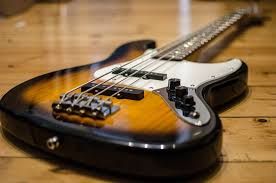

In [7]:
data['review'] = data['reviewText'] + ' ' + data['summary']
data.drop(['reviewText', 'summary'], axis = 1, inplace = True)
data

overall                                             review
0          5.0  Not much to write about here, but it does exac...
1          5.0  The product does exactly as it should and is q...
2          5.0  The primary job of this device is to block the...
3          5.0  Nice windscreen protects my MXL mic and preven...
4          5.0  This pop filter is great. It looks and perform...
...        ...                                                ...
10256      5.0  Great, just as expected.  Thank to all. Five S...
10257      5.0  I've been thinking about trying the Nanoweb st...
10258      4.0  I have tried coated strings in the past ( incl...
10259      4.0  Well, MADE by Elixir and DEVELOPED with Taylor...
10260      4.0  These strings are really quite good, but I wou...

[10261 rows x 2 columns]

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQPOtfN9djOutZeByWScVDwPS4tdGpiLehsAPiHVPD6_g&usqp=CAU&ec=45682160)

In [8]:
for i in range(0, data['overall'].size):
    if data['overall'][i] > 3.0:
        data['overall'][i] = 1
    else:
        data['overall'][i] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


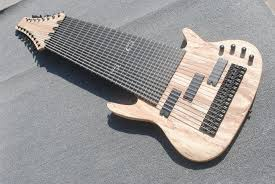

In [9]:
data['overall'].value_counts()

1.0    9022
0.0    1239
Name: overall, dtype: int64

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQuU_oc0rR-1YAQgy25bgx8Q7DD_Zw4TGWj_Q&usqp=CAU)

In [10]:
#Cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', str(data['review'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


![](https://images-na.ssl-images-amazon.com/images/I/71WdnQJYyNL._AC_SX425_.jpg)

In [11]:
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [12]:
#Independent Vector
X = cv.fit_transform(corpus).toarray()
#Dependent Vector
y = data['overall']

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

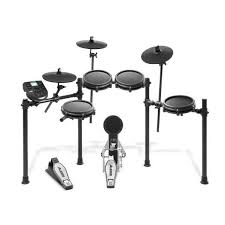

In [14]:
# Training the  model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 135   93]
 [ 534 1291]]


In [17]:

# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
report = classification_report(y_test, y_pred)

print('The accuracy of the classifier is {0}%'.format(accuracy))
print('\nThe calculated RMSE is {0}'.format(rmse))
print('\nThe classification report is as follows:\n')
print(report)

The accuracy of the classifier is 69.46%

The calculated RMSE is 0.5526361568613055

The classification report is as follows:

              precision    recall  f1-score   support

         0.0       0.20      0.59      0.30       228
         1.0       0.93      0.71      0.80      1825

    accuracy                           0.69      2053
   macro avg       0.57      0.65      0.55      2053
weighted avg       0.85      0.69      0.75      2053



In [18]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 75 , activation = 'relu' , input_dim = X_train.shape[1]))
classifier.add(Dense(units = 50 , activation = 'relu'))
classifier.add(Dense(units = 25 , activation = 'relu'))
classifier.add(Dense(units = 10 , activation = 'relu')) 
classifier.add(Dense(units = 1 , activation = 'sigmoid'))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

![](https://wand-research.com/wp-content/uploads/2018/02/understanding-cnn.gif)

In [20]:
classifier.fit(X_train,y_train , epochs = 10)

Epoch 1/10
257/257 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.8744
Epoch 2/10
257/257 [==============================] - 1s 2ms/step - loss: 0.2037 - accuracy: 0.9187
Epoch 3/10
257/257 [==============================] - 1s 3ms/step - loss: 0.1032 - accuracy: 0.9624
Epoch 4/10
257/257 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 5/10
257/257 [==============================] - 1s 2ms/step - loss: 0.0095 - accuracy: 0.9988
Epoch 6/10
257/257 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.9996
Epoch 7/10
257/257 [==============================] - 1s 2ms/step - loss: 6.3485e-04 - accuracy: 0.9999
Epoch 8/10
257/257 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 9/10
257/257 [==============================] - 1s 2ms/step - loss: 3.1840e-04 - accuracy: 0.9999
Epoch 10/10
257/257 [==============================] - 1s 2ms/step - loss: 3.2598e-04 - accu

In [21]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = classifier.evaluate(X_test,y_test)
print("test loss, test acc:", results)

Evaluate on test data
65/65 [==============================] - 0s 1ms/step - loss: 0.9900 - accuracy: 0.8933
test loss, test acc: [0.9900403618812561, 0.8933268189430237]


## Please have a look at my other notebooks and upvote if you like them.
# https://www.kaggle.com/souhardyaganguly/notebooks